# Post-Model Analysis

Here, we will perform an analysis in which the main goal is going to be to turn this predictions into timely and relevant decisions. 

I will identify those points (days) in which btc should be bought or sold.

First, we will load the data in which predictions are contained. We will only use the 2-years prediction dataset.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv(r'prediccion_2_anos.csv')

In [61]:
df.columns

Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper'], dtype='object')

In [62]:
df.rename(columns={'ds':'Date','yhat':'Close', 'yhat_lower':'Low', 'yhat_upper':'High'}, inplace=True)

In [63]:
df.head()

,Date,Close,Low,High
0,2022-02-16,35406.354474,31083.957227,39780.954773
1,2022-02-17,35603.964616,31057.284200,40284.611952
2,2022-02-18,36031.912825,31778.648998,40675.046442
3,2022-02-19,36357.780773,32045.919024,40972.500319
4,2022-02-20,36714.356822,31912.563493,41286.317686


First, we will calculate the SMA for short, medium and long term.

In [64]:
df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_30'] = df['Close'].rolling(window=30).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()

Now, I will mark with 1 those days in which there is a bullish trend.

In [65]:
df['Signal'] = np.where(df['SMA_7'] > df['SMA_30'], 1, 0)
df['Crossover'] = df['Signal'].diff()

In [66]:
df.columns

Index(['Date', 'Close', 'Low', 'High', 'SMA_7', 'SMA_30', 'SMA_100', 'Signal',
       'Crossover'],
      dtype='object')

Let's visualize the crossovers

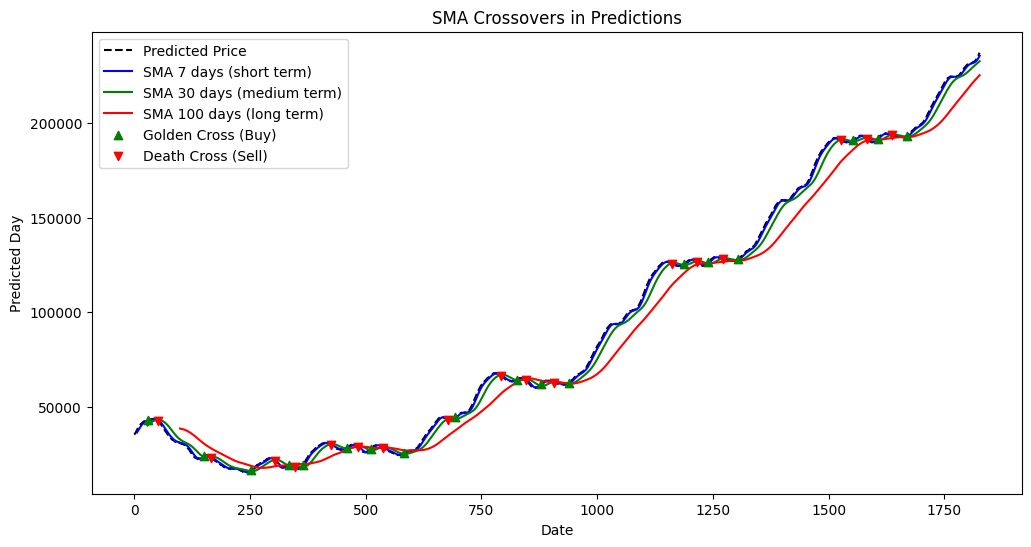

In [67]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = 'Predicted Price', color = 'black', linestyle = '--')
plt.plot(df['SMA_7'], label = 'SMA 7 days (short term)', color = 'blue')
plt.plot(df['SMA_30'], label = 'SMA 30 days (medium term)', color = 'green')
plt.plot(df['SMA_100'], label = 'SMA 100 days (long term)', color = 'red')

plt.scatter(df.index[df["Crossover"] == 1], df["Close"][df["Crossover"] == 1], marker="^", color="green", label="Golden Cross (Buy)", zorder=5)
plt.scatter(df.index[df["Crossover"] == -1], df["Close"][df["Crossover"] == -1], marker="v", color="red", label="Death Cross (Sell)", zorder=5)

plt.legend()
plt.title("SMA Crossovers in Predictions")
plt.xlabel("Date")
plt.ylabel("Predicted Day")
plt.show()

Now, let's find those days in which, likely, there will be a bullish trend.

In [68]:
df_buy = df[df['Crossover']==1]

In [69]:
df_buy.head(18)


,Date,Close,Low,High,SMA_7,SMA_30,SMA_100,Signal,Crossover
29,2022-03-17,42943.133427,38296.204803,47406.513301,42722.962809,40123.994487,NaN,1,1.0
151,2022-07-17,24009.921801,19429.013590,28523.449373,23759.552290,23629.471722,30517.005171,1,1.0
253,2022-10-27,16597.154819,12091.640261,20953.413780,16080.828805,16000.477144,18764.086020,1,1.0
335,2023-01-17,19158.915070,14576.112871,23585.670599,18962.139676,18839.318570,19244.906471,1,1.0
365,2023-02-16,19344.388938,14813.664945,24175.215352,18446.110981,18257.547759,19737.307222,1,1.0
459,2023-05-21,28320.932688,23912.688636,32903.396243,28063.661387,27956.483983,27232.291428,1,1.0
511,2023-07-12,27992.391976,23197.455548,32569.207720,27157.888564,27052.657130,28466.261660,1,1.0
583,2023-09-22,25735.923082,21168.371486,30420.912087,25323.627981,25176.687034,27021.182689,1,1.0
693,2024-01-10,44638.459180,39875.948421,49346.549682,43836.938396,43694.708609,37380.194141,1,1.0
827,2024-05-23,64402.965411,59956.343799,68864.062310,64097.455032,64070.161897,63111.214534,1,1.0


In [70]:
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 29 to 1669
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       18 non-null     object 
 1   Close      18 non-null     float64
 2   Low        18 non-null     float64
 3   High       18 non-null     float64
 4   SMA_7      18 non-null     float64
 5   SMA_30     18 non-null     float64
 6   SMA_100    17 non-null     float64
 7   Signal     18 non-null     int32  
 8   Crossover  18 non-null     float64
dtypes: float64(7), int32(1), object(1)
memory usage: 1.3+ KB


In [71]:
df_sell = df[df['Crossover'] < 1]

In [72]:
df_sell.head(15)

,Date,Close,Low,High,SMA_7,SMA_30,SMA_100,Signal,Crossover
1,2022-02-17,35603.964616,31057.284200,40284.611952,NaN,NaN,NaN,0,0.0
2,2022-02-18,36031.912825,31778.648998,40675.046442,NaN,NaN,NaN,0,0.0
3,2022-02-19,36357.780773,32045.919024,40972.500319,NaN,NaN,NaN,0,0.0
4,2022-02-20,36714.356822,31912.563493,41286.317686,NaN,NaN,NaN,0,0.0
5,2022-02-21,37369.033490,32763.524339,41895.881132,NaN,NaN,NaN,0,0.0
6,2022-02-22,37660.036229,33020.438157,42176.838344,36449.062747,NaN,NaN,0,0.0
7,2022-02-23,38272.616672,33783.497193,42596.743083,36858.528775,NaN,NaN,0,0.0
8,2022-02-24,38507.790086,34024.861195,43004.160223,37273.360985,NaN,NaN,0,0.0
9,2022-02-25,38943.338532,34387.454108,43535.876926,37689.278943,NaN,NaN,0,0.0
10,2022-02-26,39248.030149,34637.728410,43596.937145,38102.171711,NaN,NaN,0,0.0


In [73]:
df_sell.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1808 entries, 1 to 1826
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1808 non-null   object 
 1   Close      1808 non-null   float64
 2   Low        1808 non-null   float64
 3   High       1808 non-null   float64
 4   SMA_7      1803 non-null   float64
 5   SMA_30     1780 non-null   float64
 6   SMA_100    1711 non-null   float64
 7   Signal     1808 non-null   int32  
 8   Crossover  1808 non-null   float64
dtypes: float64(7), int32(1), object(1)
memory usage: 134.2+ KB


Finally, let's export the file which shows when to buy.  

In [74]:
df_buy.to_csv('when_to_buy.csv', index = False)